## A minimal model for SP dataset

In [1]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments.batched_online import simulate, make_key

from utils import ipr, entropy, entropy_sort, mean_sort, var_sort, plot_receptive_fields, plot_rf_evolution

def simulate_or_load(**kwargs):
    path_key = make_key(**kwargs)
    if path_key + '.npz' in os.listdir('../localization/results/weights'):
        print('Already simulated')
        data = np.load('../localization/results/weights/' + path_key + '.npz', allow_pickle=True)
        weights_, metrics_ = data['weights'], data['metrics']
    else:
        print('Simulating')
        weights_, metrics_ = simulate(**kwargs)
    return weights_, metrics_

In [2]:
config_ = dict(
  seed=0,
  num_dimensions=40,
  init_scale=1.0,
  model_cls=models.SimpleNet,
  optimizer_fn=optax.sgd,
  batch_size=1000,
  dataset_cls=datasets.SinglePulseDataset,
  support=(-1, 1),
  class_proportion=0.5,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  save_=True,
  xi1=(0.2, 0.25),
  xi2=(0.05, 0.1),
  activation='relu',
)

Already simulated


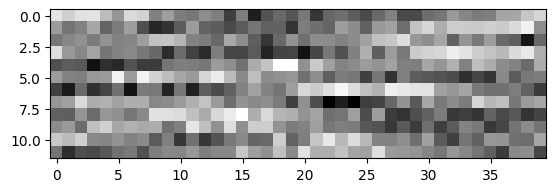

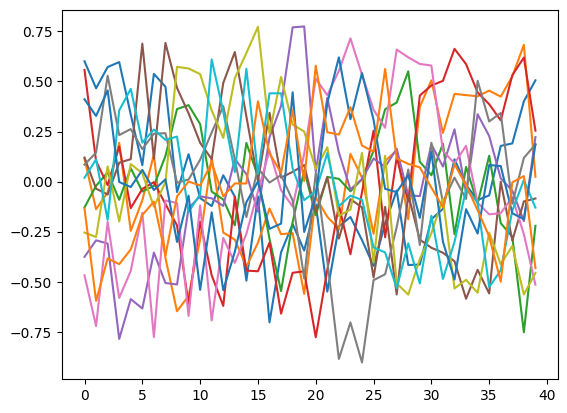

In [3]:
# how about 12 hidden units?
config = config_.copy()
config['num_hiddens'] = 12
config['learning_rate'] = 0.1
config['num_epochs'] = 5000
config['use_bias'] = False

weights12, metrics12 = simulate_or_load(**config)
plt.imshow(weights12[-1], cmap='gray')
plt.show()
_ = plt.plot(weights12[-1].T)